In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from google.colab import files


## 1.Dataset Analysis


In [2]:
uploaded=files.upload()

Saving bank-additional.csv to bank-additional.csv


In [3]:
df = pd.read_csv("bank-additional.csv", sep=';')
print(df.head())

   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.e

In [4]:
df['y'].value_counts()

,count
y,
no,3668
yes,451


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


## 2. Data Cleaning


In [8]:
df["y"].describe()



,y
count,4119
unique,2
top,no
freq,3668


In [9]:
df["y"].value_counts()

,count
y,
no,3668
yes,451


In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

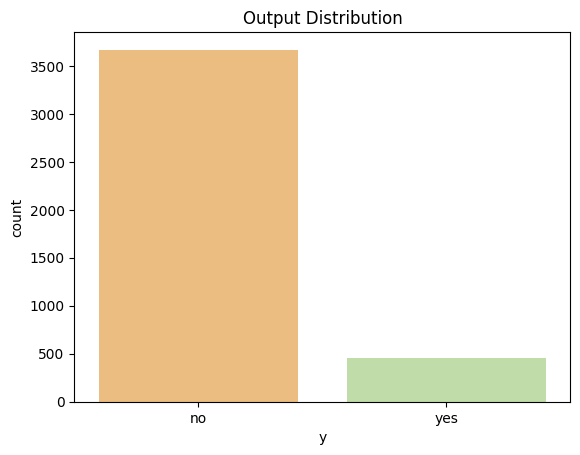

In [11]:
sns.countplot(x = df["y"], palette = "Spectral")
plt.title("Output Distribution")
plt.show()

In [12]:
print("\n Columns containing 'unknown' values:")
for col in df.select_dtypes(include='object').columns:
    unknown_count = df[col].value_counts().get('unknown', 0)
    if unknown_count > 0:
        print(f"→ {col}: {unknown_count} instances of 'unknown'")


 Columns containing 'unknown' values:
→ job: 39 instances of 'unknown'
→ marital: 11 instances of 'unknown'
→ education: 167 instances of 'unknown'
→ default: 803 instances of 'unknown'
→ housing: 105 instances of 'unknown'
→ loan: 105 instances of 'unknown'


In [13]:
print("\n number of values in default column:")
print(df['default'].value_counts())


 number of values in default column:
default
no         3315
unknown     803
yes           1
Name: count, dtype: int64


In [14]:
df_cleaned = df.drop(columns=['default', 'duration'])
print(" 'default' and 'duration' column has been deleted. cleaned dataset :", df_cleaned.shape)

 'default' and 'duration' column has been deleted. cleaned dataset : (4119, 19)


In [15]:
df_cleaned.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [16]:
columns_with_unknown = ['job', 'marital', 'education', 'housing', 'loan']

for col in columns_with_unknown:
    mode_value = df_cleaned[col].mode()[0]  # En sık geçen değeri al(mod)
    df_cleaned[col] = df_cleaned[col].replace('unknown', mode_value)

print(" 'unknown' values in selected columns have been replaced with the mode value.")
print(" Columns affected:", columns_with_unknown)

 'unknown' values in selected columns have been replaced with the mode value.
 Columns affected: ['job', 'marital', 'education', 'housing', 'loan']


In [17]:
if 'pdays' in df_cleaned.columns:
    df_cleaned['was_contacted_before'] = df_cleaned['pdays'].apply(lambda x: 0 if x == 999 else 1)
    df_cleaned = df_cleaned.drop('pdays', axis=1)
    print("\nFeature 'was_contacted_before' created from 'pdays', and 'pdays' column dropped.")
    print("'was_contacted_before' value counts:")
    print(df_cleaned['was_contacted_before'].value_counts())
else:
    print("\n'pdays' column not found for feature engineering.")


Feature 'was_contacted_before' created from 'pdays', and 'pdays' column dropped.
'was_contacted_before' value counts:
was_contacted_before
0    3959
1     160
Name: count, dtype: int64


In [18]:
df_cleaned['y']

,y
0,no
1,no
2,no
3,no
4,no
...,...
4114,no
4115,no
4116,no
4117,no


## 3. Preprocessing


In [19]:
df_cleaned['y'] = df_cleaned['y'].map({'yes': 1, 'no': 0})

In [20]:
X = df_cleaned.drop('y', axis=1)
y = df_cleaned['y']

In [21]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(exclude='object').columns.tolist()


In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Ölçekleme (StandardScaler) mean=0, std=1 yapar
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Kategorikleri encode eder
    ]
)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [24]:
smote_pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42))
])

In [25]:
X_train_resampled, y_train_resampled = smote_pipeline.fit_resample(X_train, y_train)

In [26]:
print("Preprocessing complete.")
print("Resampled training target distribution:")
print(pd.Series(y_train_resampled).value_counts())

Preprocessing complete.
Resampled training target distribution:
y
1    2934
0    2934
Name: count, dtype: int64


In [27]:
X_test_transformed = smote_pipeline.named_steps['preprocessing'].transform(X_test)

In [28]:
print("\n First 10 rows of X_train_resampled:")
print(pd.DataFrame(X_train_resampled).head(10))


 First 10 rows of X_train_resampled:
         0         1         2         3         4         5         6   \
0  0.753520  0.191474 -0.363291 -1.191328 -1.170168 -1.251261 -1.333391   
1 -0.596326 -0.202105  1.426013 -1.191328 -1.170168 -1.251261 -1.302893   
2  0.657102 -0.595684 -0.363291 -1.191328 -1.170168 -1.251261 -1.308647   
3  1.042773  0.191474 -0.363291  0.849013 -0.224400  0.929473  0.779600   
4 -1.078413 -0.595684 -0.363291 -1.191328 -1.170168 -1.251261 -1.339145   
5 -0.981996 -0.202105  1.426013 -0.107397 -0.643215 -0.344421  0.237542   
6  0.078597 -0.202105 -0.363291  0.657731  0.719651  0.864699  0.718604   
7  0.271432 -0.595684 -0.363291  0.657731  0.719651  0.864699  0.718604   
8  0.657102  1.765791 -0.363291  0.849013 -0.224400  0.929473  0.780751   
9 -0.403491 -0.202105 -0.363291  0.849013 -0.224400  0.929473  0.779600   

         7         8    9   ...   44   45   46   47   48   49   50   51   52  \
0 -0.895014 -0.206692  1.0  ...  0.0  0.0  0.0  0.0  0.0

In [29]:
print("\n First 10 rows of X_test_transformed:")
print(pd.DataFrame(X_test_transformed).head(10))


 First 10 rows of X_test_transformed:
         0         1         2         3         4         5         6   \
0  0.078597 -0.595684  1.426013 -1.191328 -0.857772 -1.445584 -1.267792   
1 -1.560501  0.191474 -0.363291 -1.191328 -1.170168 -1.251261 -1.360436   
2 -0.885578 -0.202105 -0.363291  0.849013 -0.224400  0.929473  0.781326   
3 -0.692743 -0.202105 -0.363291  0.657731  0.719651  0.864699  0.720330   
4 -0.210656  0.191474  1.426013 -1.191328 -1.170168 -1.251261 -1.360436   
5 -0.596326 -0.202105  1.426013 -0.107397 -0.643215 -0.344421  0.294510   
6 -1.078413 -0.595684 -0.363291  0.849013  0.589200 -0.495561  0.779600   
7  0.946355  0.978633 -0.363291  0.849013  0.589200 -0.495561  0.779024   
8  0.271432  0.191474 -0.363291  0.657731  0.719651  0.864699  0.719755   
9 -0.596326 -0.595684 -0.363291  0.849013 -0.224400  0.929473  0.780175   

         7         8    9   ...   44   45   46   47   48   49   50   51   52  \
0 -0.895014 -0.206692  0.0  ...  0.0  0.0  1.0  0.0  0.

In [30]:
print(" class distrubution (SMOTE sonrası):")
print(pd.Series(y_train_resampled).value_counts())

 class distrubution (SMOTE sonrası):
y
1    2934
0    2934
Name: count, dtype: int64


In [31]:
# Oranları da görelim
print("\n class rate (%):")
print(pd.Series(y_train_resampled).value_counts(normalize=True) * 100)
# 0: 50.0% (2000), 1: 50.0% (2000) şeklinde çıktı alırız yani sınıf dengesizliği giderildi.


 class rate (%):
y
1    50.0
0    50.0
Name: proportion, dtype: float64


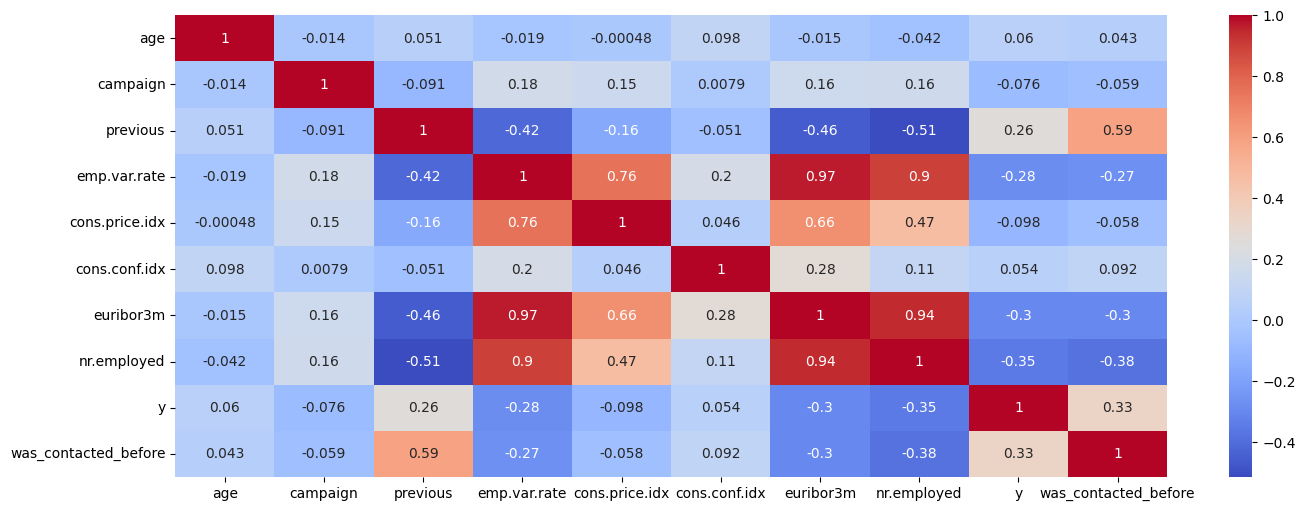

In [32]:
plt.figure(figsize=(16,6))
sns.heatmap(df_cleaned.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()

## 4. Feature Selection

In [33]:
#Neden feature selection yapıyoruz?
#OneHotEncoder sonrası sütun sayısı arttı (55 oldu)
#Hepsi model için anlamlı olmayabilir
#Biz en bilgilendirici olanları seçmek istiyoruz → bu hem performans artırır, hem hız kazandırır(K tane özellik seçeceğiz)

#mutual_info_classif: Her bir özelliğin hedef değişkenle olan bilgi bağımlılığını hesaplar.
selector = SelectKBest(score_func=mutual_info_classif, k=20)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test_transformed)
print("Feature selection completed.")

Feature selection completed.


In [34]:
# Eğitim verisinin şekli (özellik sayısı 20 olmalı)
print("\n X_train_selected shape:", X_train_selected.shape)



 X_train_selected shape: (5868, 20)


In [35]:

# Test verisinin şekli (özellik sayısı 20 olmalı)
print(" X_test_selected shape:", X_test_selected.shape)

 X_test_selected shape: (824, 20)


In [36]:

# SMOTE sonrası sınıf dağılımı (beklenen: 50/50)
print("\n Class distribution after SMOTE:")
print(y_train_resampled.value_counts())


 Class distribution after SMOTE:
y
1    2934
0    2934
Name: count, dtype: int64


In [37]:
print("\n Class proportion (%):")
print(y_train_resampled.value_counts(normalize=True) * 100)


 Class proportion (%):
y
1    50.0
0    50.0
Name: proportion, dtype: float64


In [38]:
print("\n First 5 rows of X_train_selected:")
print(pd.DataFrame(X_train_selected).head())


 First 5 rows of X_train_selected:
         0         1         2         3         4         5         6    7   \
0  0.753520  0.191474 -1.191328 -1.170168 -1.251261 -1.333391 -0.895014  1.0   
1 -0.596326 -0.202105 -1.191328 -1.170168 -1.251261 -1.302893 -0.895014  0.0   
2  0.657102 -0.595684 -1.191328 -1.170168 -1.251261 -1.308647 -0.895014  0.0   
3  1.042773  0.191474  0.849013 -0.224400  0.929473  0.779600  0.841761  0.0   
4 -1.078413 -0.595684 -1.191328 -1.170168 -1.251261 -1.339145 -0.895014  0.0   

    8    9    10   11   12   13   14   15   16   17   18   19  
0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  
4  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  


In [39]:
print("\n First 5 rows of X_test_selected:")
print(pd.DataFrame(X_test_selected).head())



 First 5 rows of X_test_selected:
         0         1         2         3         4         5         6    7   \
0  0.078597 -0.595684 -1.191328 -0.857772 -1.445584 -1.267792 -0.895014  0.0   
1 -1.560501  0.191474 -1.191328 -1.170168 -1.251261 -1.360436 -0.895014  0.0   
2 -0.885578 -0.202105  0.849013 -0.224400  0.929473  0.781326  0.841761  0.0   
3 -0.692743 -0.202105  0.657731  0.719651  0.864699  0.720330  0.342270  1.0   
4 -0.210656  0.191474 -1.191328 -1.170168 -1.251261 -1.360436 -0.895014  0.0   

    8    9    10   11   12   13   14   15   16   17   18   19  
0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  
2  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
4  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  


In [40]:
feature_names = preprocessor.get_feature_names_out()
selected_features = feature_names[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: ['num__age' 'num__campaign' 'num__emp.var.rate' 'num__cons.price.idx'
 'num__cons.conf.idx' 'num__euribor3m' 'num__nr.employed'
 'cat__job_admin.' 'cat__job_technician' 'cat__marital_married'
 'cat__education_high.school' 'cat__education_university.degree'
 'cat__housing_no' 'cat__housing_yes' 'cat__loan_yes'
 'cat__day_of_week_fri' 'cat__day_of_week_mon' 'cat__day_of_week_thu'
 'cat__day_of_week_tue' 'cat__day_of_week_wed']


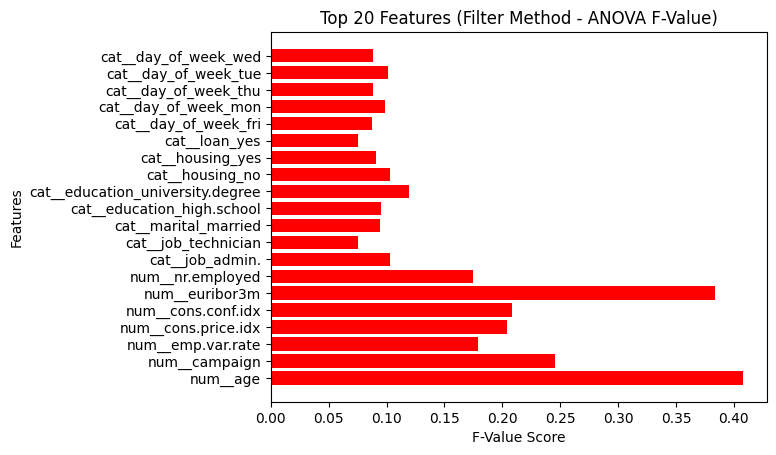

In [41]:
scores = selector.scores_[selector.get_support()]
plt.barh(selected_features, scores, color='red')
plt.title("Top 20 Features (Filter Method - ANOVA F-Value)")
plt.xlabel("F-Value Score")
plt.ylabel("Features")
plt.show()

## 5. Model Selection

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, mean_squared_error
import numpy as np

In [43]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [44]:
for name, model in models.items():
    # Build a pipeline with preprocessing, SMOTE, feature selection, and classifier
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),  # Scaling + Encoding
        ('smote', SMOTE(random_state=42)),  # Handle imbalance
        ('feature_selector', SelectKBest(score_func=f_classif, k=20)),  # Feature selection
        ('classifier', model)  # ML model
    ])

    # Train the pipeline on original X_train/y_train (pipeline handles resampling + preprocessing)
    pipeline.fit(X_train, y_train)

    # Predict on original X_test (which is untouched)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    # Evaluation
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    auc = roc_auc_score(y_test, y_proba)

    print(f"Model: {name}")
    print(f"Training Score: {train_score:.3f}")
    print(f"Test Score: {test_score:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"ROC-AUC: {auc:.3f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

Model: Logistic Regression
Training Score: 0.820
Test Score: 0.823
RMSE: 0.421
ROC-AUC: 0.796
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.89       734
           1       0.33      0.62      0.43        90

    accuracy                           0.82       824
   macro avg       0.64      0.73      0.66       824
weighted avg       0.88      0.82      0.84       824

--------------------------------------------------
Model: Decision Tree
Training Score: 0.964
Test Score: 0.874
RMSE: 0.355
ROC-AUC: 0.623
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       734
           1       0.40      0.30      0.34        90

    accuracy                           0.87       824
   macro avg       0.66      0.62      0.64       824
weighted avg       0.86      0.87      0.87       824

--------------------------------------------------
Model: Random 

Choosing the Final Model From the examples in the above table:

Random Forest has the high ROC-AUC (0.714) and a lowest RMSE (0.354). Random Forest performs satisfactorily on training and test scores to reflect no significant overfitting. It has a good solid F1-score (0.95) for subscribed class, so it is suitable for an imbalanced classification task. That is why Random Forest would be the final model.

# 6. Hyperparameter Tuning using GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [46]:
# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Define the full pipeline with SMOTE and feature selection
tuned_rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # scaling + encoding
    ('smote', SMOTE(random_state=42)),  # resampling handled inside pipeline
    ('feature_selector', SelectKBest(score_func=f_classif, k=20)),  # select top 20 features
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest model
])



In [47]:
rf_grid_search = GridSearchCV(
    tuned_rf_pipeline,
    param_grid=rf_param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=2
)
# Fit the grid search on the ORIGINAL (unresampled) train set
rf_grid_search.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
best_rf_pipeline = rf_grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.8s
[CV] END classifier__max_depth=Non

## 7. Evaluation


In [48]:
# Predict using the best Random Forest model
y_pred_rf = best_rf_pipeline.predict(X_test)
y_proba_rf = best_rf_pipeline.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       734
           1       0.47      0.44      0.45        90

    accuracy                           0.88       824
   macro avg       0.70      0.69      0.69       824
weighted avg       0.88      0.88      0.88       824

ROC-AUC Score: 0.7523841961852861
RMSE: 0.3413280743931446


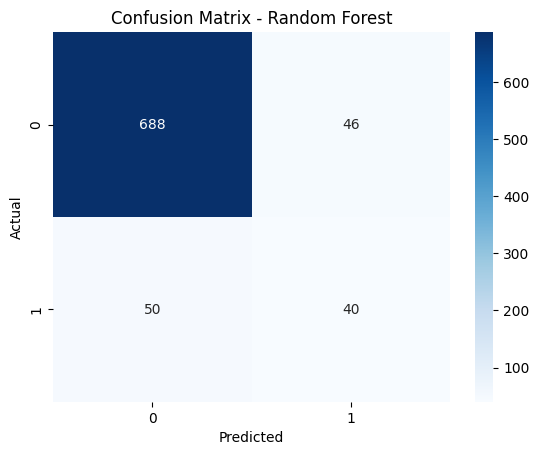

In [49]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

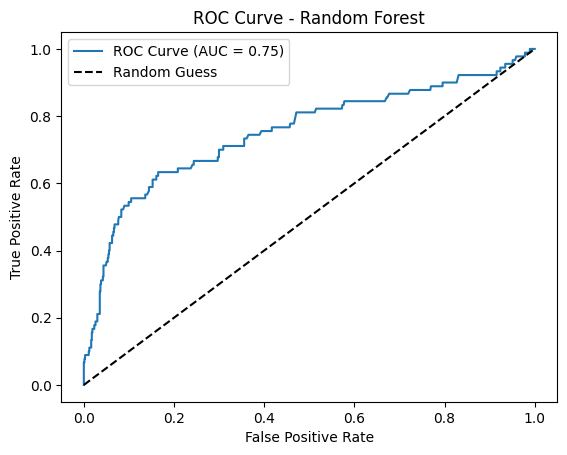

In [50]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [51]:
# Finalize the pipeline with the best Random Forest model
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif, k=20)),
    ('classifier', best_rf_pipeline.named_steps['classifier'])
])

# Fit the finalized pipeline on the entire training data
final_pipeline.fit(X_train, y_train)

# Test the pipeline on unseen data
final_predictions = final_pipeline.predict(X_test)
final_probabilities = final_pipeline.predict_proba(X_test)[:, 1]

print("Final Model Performance")
print("Classification Report:\n", classification_report(y_test, final_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, final_probabilities))

Final Model Performance
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       734
           1       0.64      0.16      0.25        90

    accuracy                           0.90       824
   macro avg       0.77      0.57      0.60       824
weighted avg       0.88      0.90      0.87       824

ROC-AUC Score: 0.7798516500151378


Feature Importance:
                       Feature  Importance
5              num__euribor3m    0.261456
6            num__nr.employed    0.241741
7   num__was_contacted_before    0.080270
19      cat__poutcome_success    0.071725
4          num__cons.conf.idx    0.067789
0               num__campaign    0.045580
3         num__cons.price.idx    0.044017
1               num__previous    0.041040
2           num__emp.var.rate    0.040574
10        cat__marital_single    0.019613
18  cat__poutcome_nonexistent    0.015114
12     cat__contact_telephone    0.014433
14             cat__month_mar    0.011608
11      cat__contact_cellular    0.011449
16             cat__month_oct    0.008838
8            cat__job_retired    0.007948
17             cat__month_sep    0.005711
9            cat__job_student    0.005338
15             cat__month_may    0.003700
13             cat__month_dec    0.002056


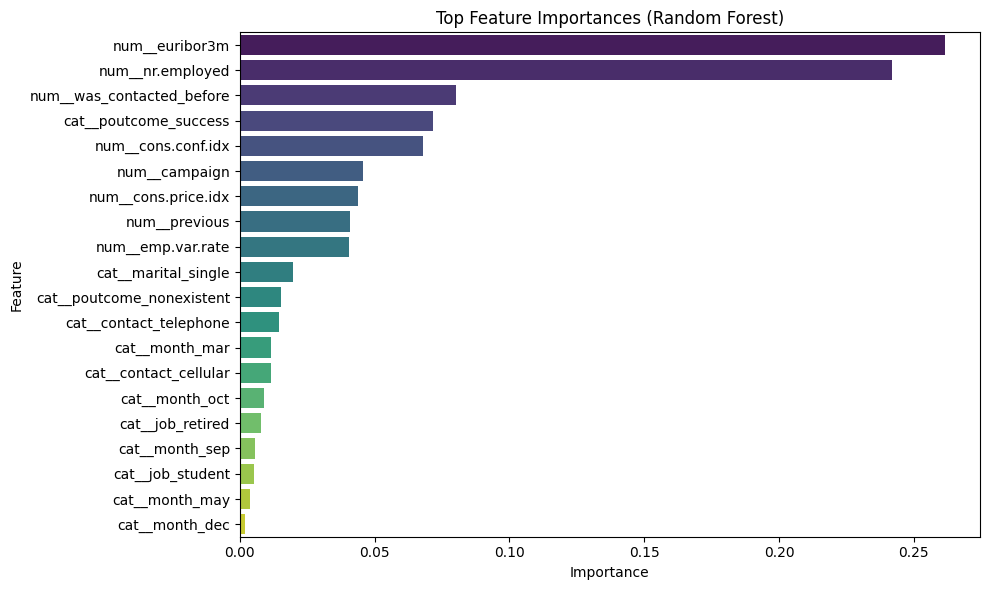

Features in the order they were added to the model:
1. num__campaign
2. num__previous
3. num__emp.var.rate
4. num__cons.price.idx
5. num__cons.conf.idx
6. num__euribor3m
7. num__nr.employed
8. num__was_contacted_before
9. cat__job_retired
10. cat__job_student
11. cat__marital_single
12. cat__contact_cellular
13. cat__contact_telephone
14. cat__month_dec
15. cat__month_mar
16. cat__month_may
17. cat__month_oct
18. cat__month_sep
19. cat__poutcome_nonexistent
20. cat__poutcome_success


In [52]:
preprocessor = final_pipeline.named_steps['preprocessor']
feature_selector = final_pipeline.named_steps['feature_selector']
classifier = final_pipeline.named_steps['classifier']

# feature names after preprocessing (OneHotEncoder and StandardScaler)
feature_names_all = preprocessor.get_feature_names_out()

# Selected features from SelectKBest
selected_feature_indices = feature_selector.get_support(indices=True)


selected_feature_names = feature_names_all[selected_feature_indices]

feature_names_all = preprocessor.get_feature_names_out()
selected_feature_indices = feature_selector.get_support(indices=True)
selected_feature_names = feature_names_all[selected_feature_indices]



# feature importances from the RF
feature_importance = classifier.feature_importances_


# Create df for feature importances
importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)


print("Feature Importance:\n", importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()
print("Features in the order they were added to the model:")
for i, feature in enumerate(selected_feature_names, 1):
    print(f"{i}. {feature}")


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
import pickle


deployment_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif, k=15)),
    ('classifier', best_rf_pipeline.named_steps['classifier'])
])


deployment_pipeline.fit(X_train, y_train)

# Saving for deployment
with open('prediction_deploy.sav', 'wb') as f:
    pickle.dump(deployment_pipeline, f)

In [54]:
files.download('prediction_deploy.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>